# Dr.リョウコの救出
*量子世界に閉じ込められてしまったDr.リョウコ。詳しくは直接Dr. リョウコにquantum realmについて尋ねてみよう。<br/>
現在、いくつかの量子ビットが励起状態となり、Dr.リョウコの行く手をはばんでいる。<br/>
救出の鍵は有名なパズルゲーム「ライツアウト」にあるらしい。<br/>
まずは以下の例題と演習でライツアウトについて学んでから、次の問題に挑んでほしい。幸運を祈る。*

[<< クリックしてDr.リョウコとウェブカメラを通じてコミュニケーションを取る>>](https://youtu.be/kLizHnvTguE)

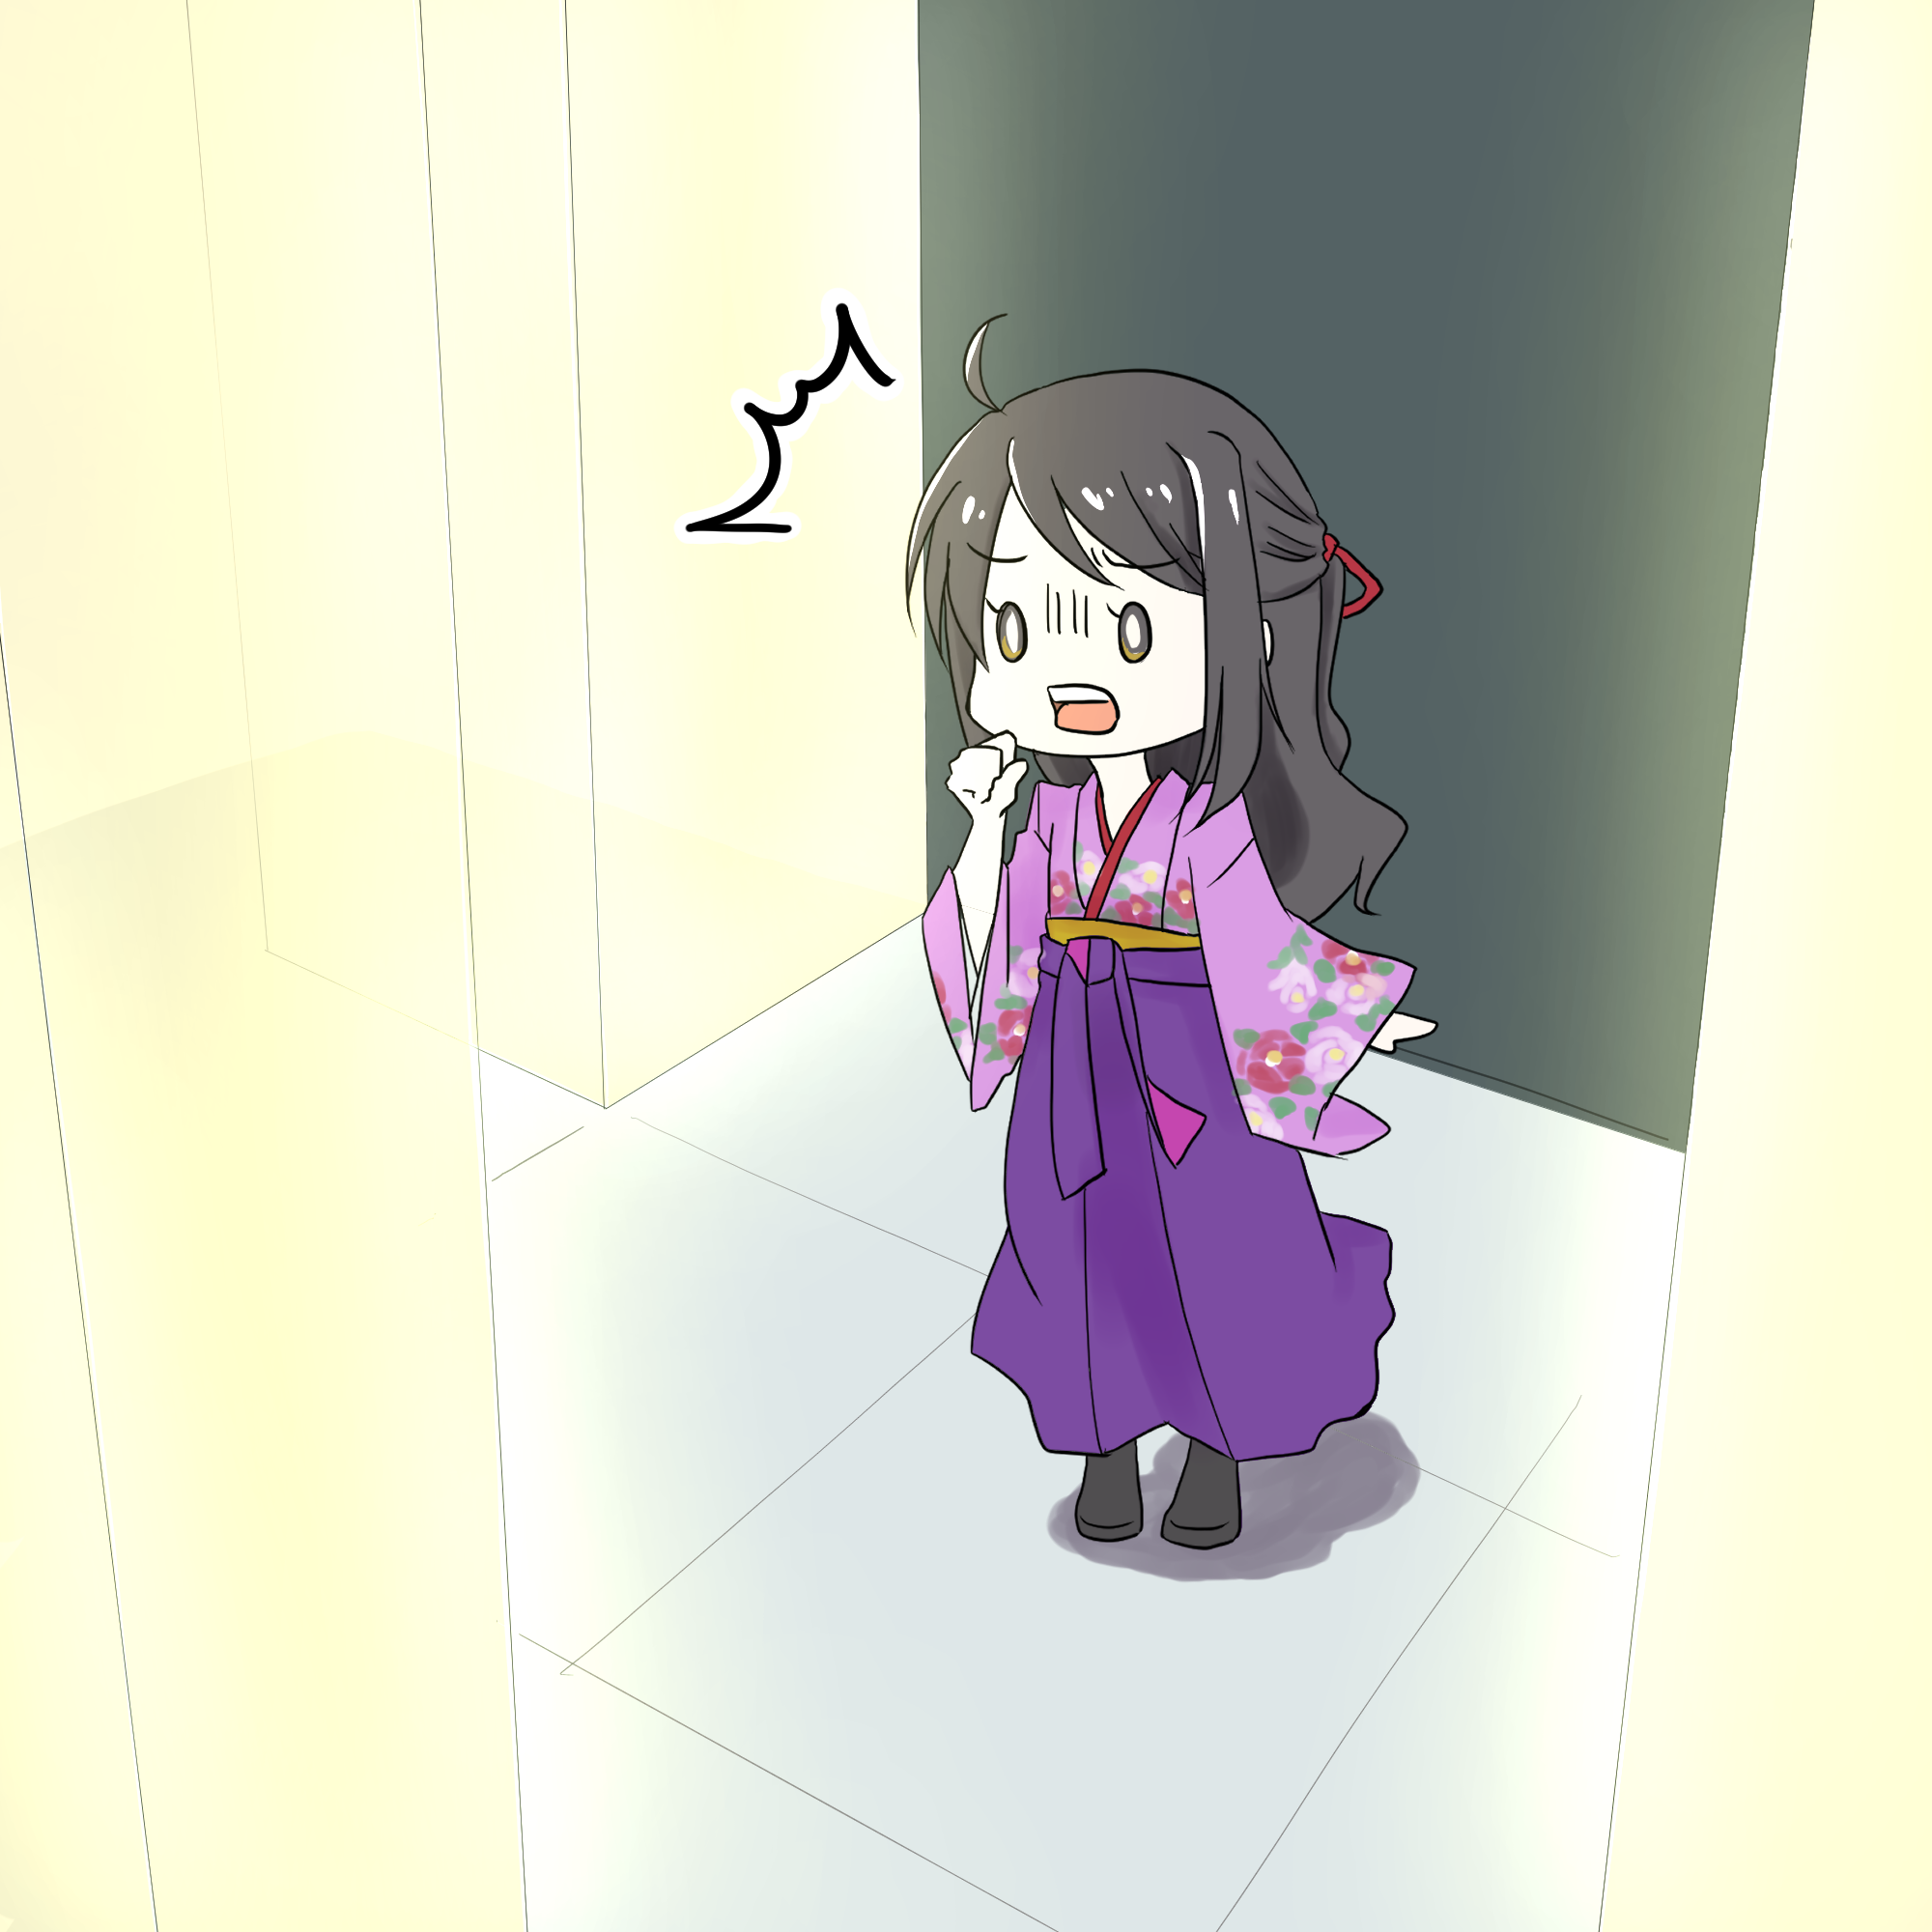

In [1]:
from IPython.display import Image, display
Image('ryoko_pillars.png')

# Week2-A: ライツアウト パズル
ライツアウトは有名なパズルゲームです。プレーヤーに格子状に並べられたライトが与えられます。このうちいくつかは点灯しており、いくつかは消灯しています。この問題の目的は、ライトを全て消灯させることです。各ライトにはスイッチがついており、それを押すことで点灯/消灯させることができます。しかしながらこのライトは少し特殊で、あるライトのスイッチを押すと、連動して上下左右の隣接したライトの状態も切り替わってしまいます。

## 例題
以下の図は、3x3のライツアウトパズルの例です。各ライトには0から8までのラベルが付いています。バイナリのリストを使用して与えられた盤面を表すことができます。`1`はオンになっているライトを表し、`0`はオフになっているライトを表します。以下のリスト(`lights`)は、この例の初期盤面を表しています（ライト 3、5、6、7がオンで、残りはオフです）。

```python
lights = [0, 0, 0, 1, 0, 1, 1, 1, 0]
```

例題は、図で示されているように、0、3、4のスイッチを操作することで解決できます。少し遊んでみると、すぐにこのパズルゲームの**2つの重要な特性**に気付くでしょう。
1. 同じスイッチを複数回押す必要はありません。
2. スイッチを押す順序は特に意味を持ちません。

従って、初期の盤面同様にバイナリのリストでパズルの解を表現できます。 ただし、ここでは`0`と`1`の意味が盤面のそれと異なります。`1`はスイッチを切り替えることを表し、`0`はスイッチを切り替えないことを表します。

```python
solution = [1, 0, 0, 1, 1, 0, 0, 0, 0]
```

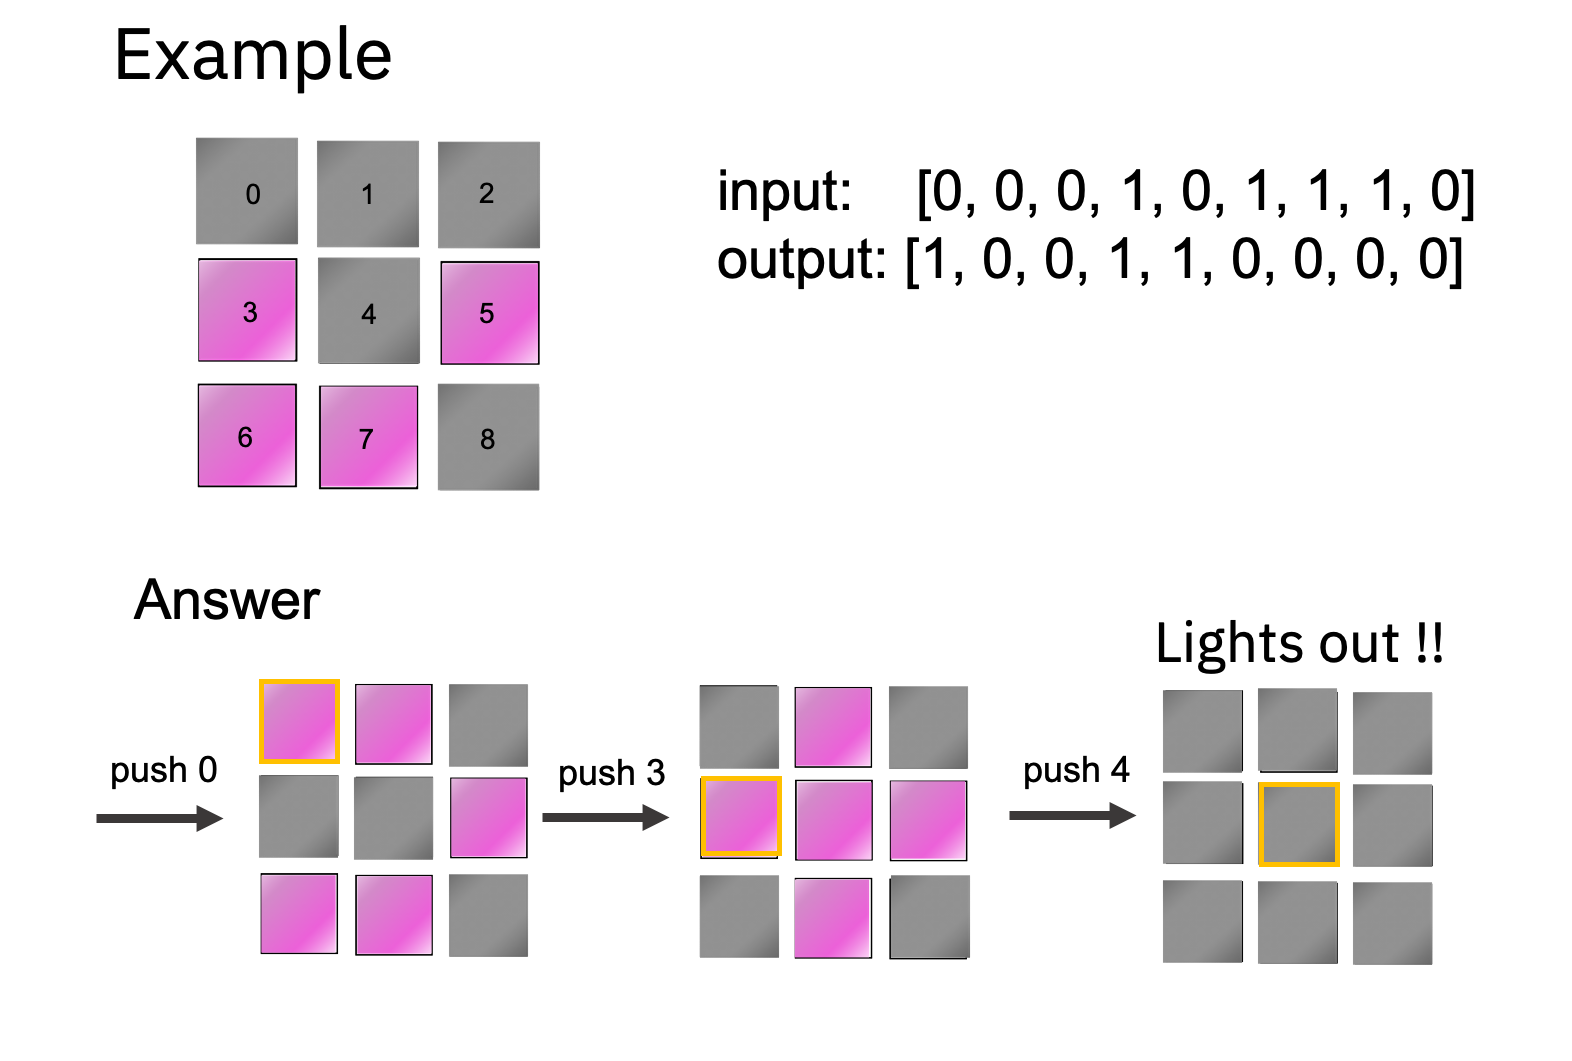

In [2]:
Image('lights_out_rule.png')

# ラーニング演習 II-A
第1週で学んだことをいかして、ライツアウトを**Groverのアルゴリズム**を使って解いてみましょう！

以下の盤面を解くための量子回路を作成してください。提出する量子回路では、パズルの答えとなる**`solution`(9bit)のみを観測してください。**
提出形式は、lightsを引数とし、`QuantumCircuit`を返す関数です（関数名は任意のものを付けて問題ありません）。異なる入力(lights)でも問題が解ける関数にしてください。異なる入力で検証を行います。

**尚、量子回路は 28 qubits 以内で実装してください。**

Groverのアルゴリズムを使わないで解く方法もいくつかありますが、今回は**Groverのアルゴリズムを使ってください**。他のチャレンジを解くときの助けになるはずです。

説明で用いられているものと同じエンディアンで解答が得られるようになっているか注意してください。以下の関数を使っても構いません。

```python
qc = qc.reverse_bits()
```

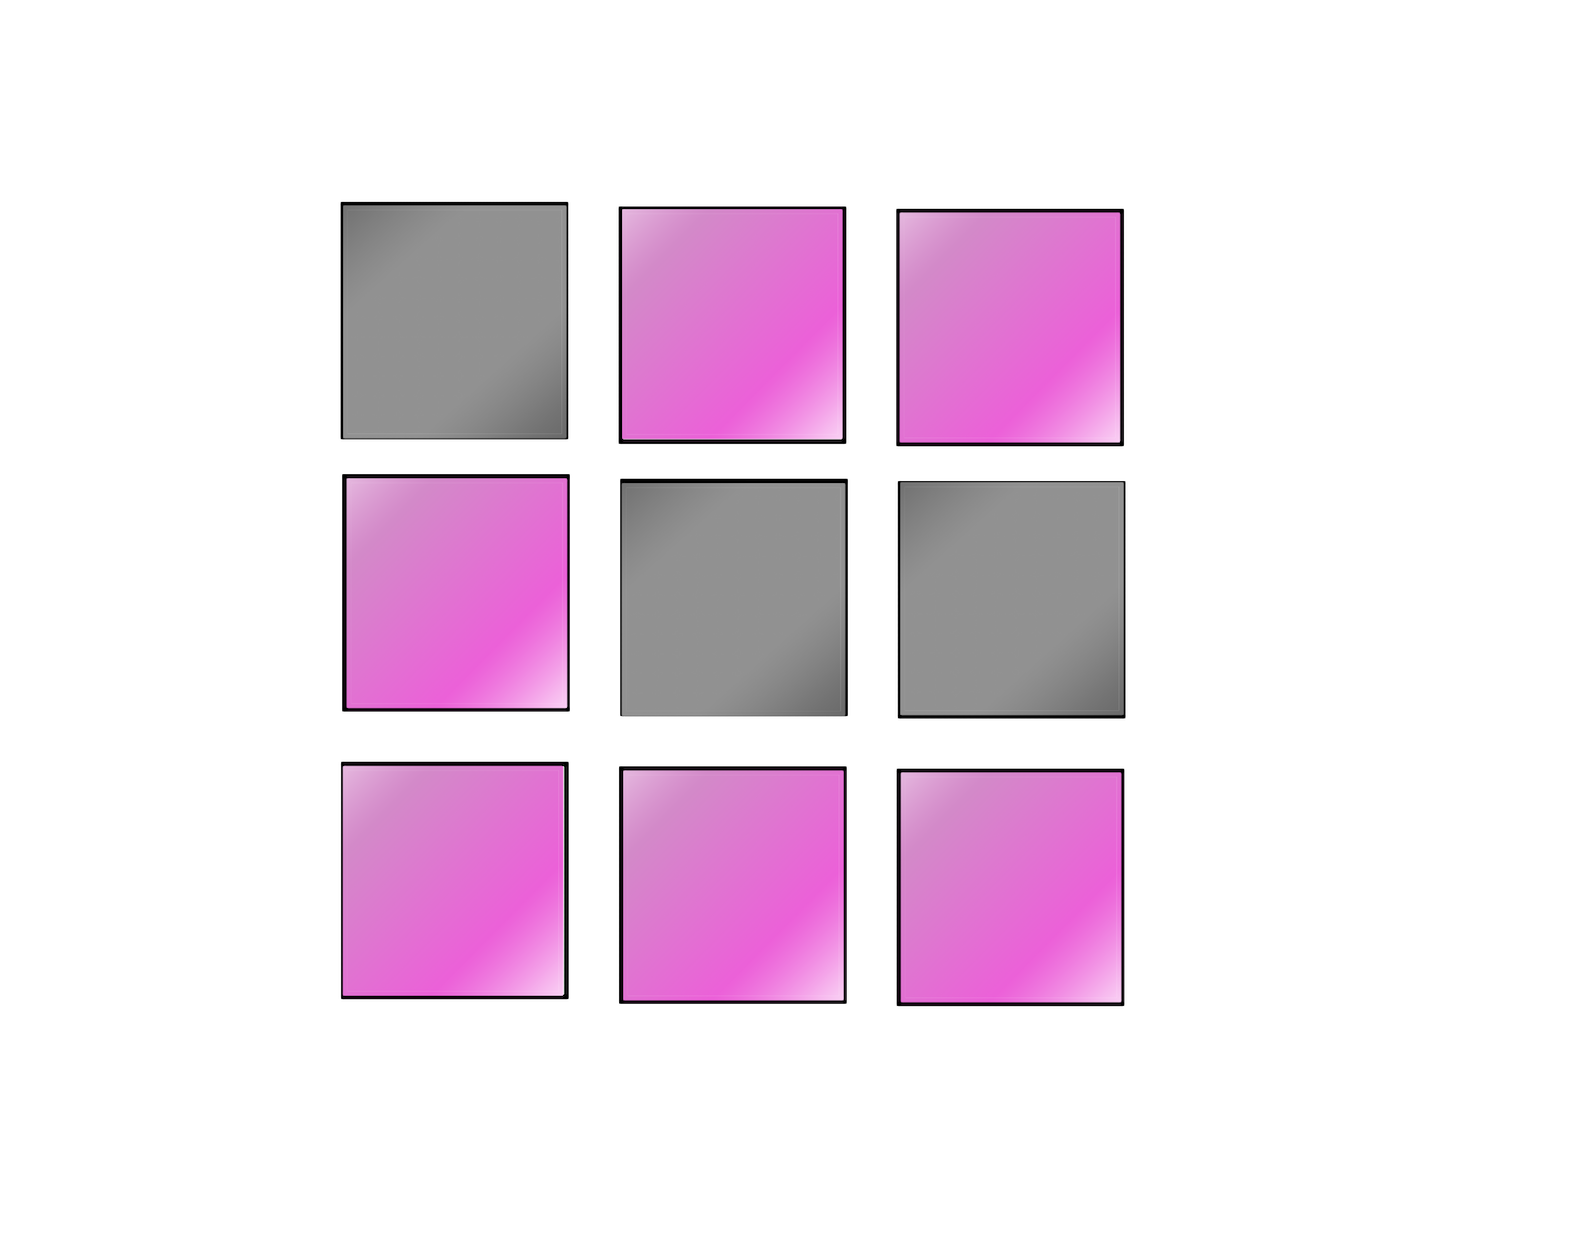

In [3]:
Image('lights_out_prob.png')

## ヒント  
この問題を解くにはWeek1-Bのものよりも複雑なオラクルが必要になるでしょう。補助量子ビットを追加することでオラクル部分の設計が容易になりますが、その取り扱いには注意が必要です。オラクル部分の終了時点では全ての補助量子ビットが初期状態に戻っているいる必要があります（この操作はUncomputationと呼ばれることもあります）。昨年の[IBM Quantum Challenge のWeek3](https://github.com/quantum-challenge/2019/blob/master/problems/week3/week3.ipynb)はこの概念の理解に役立つかもしれません。

Groverのアルゴリズムの最適な繰り返し回数がわからないときは、[このパズル](https://github.com/qiskit-community/IBMQuantumChallenge2020/tree/main/quizzes/quiz_1)を解いて[Qiskit Slack](qiskit.slack.com)のDr.リョウコ(@ryoko)にダイレクトメッセージで話しかけてみてください。Week-1Bの理論的側面に関する数式が得られます。

In [6]:
%matplotlib inline
import numpy as np

# importing Qiskit
from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# import basic plot tools
from qiskit.tools.visualization import plot_histogram

In [ ]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

In [ ]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

In [281]:

# 初期状態は以下のリストで与えられます。 
# 回路の入力としてお使いください。
lights = [0, 1, 1, 1, 0, 0, 1, 1, 1]
def init(qc, sim, lights):
    for i, s in enumerate(lights):
        if s == 1:
            qc.x(sim[i])

def simulate(qc, ans, sim):
    dx = [0, 0, 1, 0, -1]
    dy = [0, 1, 0, -1, 0]
    for i in range(3):
        for j in range(3):
            s = i*3+j;
            for d in range(5):
                nx = i+dx[d]
                ny = j+dy[d]
                if(0<=nx<3 and 0<=ny<3):
                    ns = nx*3+ny
                    qc.cx(ans[s], sim[ns])
    
def oracle(qc, sim, target):
    qc.x(sim)
    qc.x(target)
    qc.h(target)
    qc.mcx(sim, target)
    qc.h(target)
    qc.x(target)
    qc.x(sim)

def diffusion(qc, ans):
    qc.h(ans)
    qc.x(ans)
    
    qc.h(ans[-1])
    qc.mct(ans[:-1] ,ans[-1])
    qc.h(ans[-1])

    qc.x(ans)
    qc.h(ans)
    
def answer(qc, ans):
    for i, s in enumerate([1, 1, 0, 0, 1, 0, 1, 0, 1]):
        if s == 1:qc.x(ans[i])
def week2a_ans_func(lights):
    # 最適なoracle適用回数を計算
    n = 9
    N = 2**n
    theta = np.arccos(np.sqrt((N-1)/N))
    oracle_num = int(np.argmin(abs(np.pi/2-(np.arange(16)*2+1)*theta)))
    print(oracle_num)
    
    # quantum circuitの準備
    qr = QuantumRegister(n*2+1)
    cr = ClassicalRegister(n)
    qc = QuantumCircuit(qr, cr)
    ans = qr[:n]
    sim = qr[n:n*2]
    oracle_target = qr[n*2]
    
    #補助bit(9~17)をlightsに基づいて初期化
    init(qc, sim, lights)
    answer(qc, ans)
    simulate(qc, ans, sim)
    qc.barrier()
    for i in range(n):
        qc.measure(sim[i], cr[-1-i])
    return qc

In [290]:

# 初期状態は以下のリストで与えられます。 
# 回路の入力としてお使いください。
lights = [0, 1, 1, 1, 0, 0, 1, 1, 1]
def init(qc, sim, lights):
    for i, s in enumerate(lights):
        if s == 1:
            qc.x(sim[i])

def simulate(qc, ans, sim):
    dx = [0, 0, 1, 0, -1]
    dy = [0, 1, 0, -1, 0]
    for i in range(3):
        for j in range(3):
            s = i*3+j;
            for d in range(5):
                nx = i+dx[d]
                ny = j+dy[d]
                if(0<=nx<3 and 0<=ny<3):
                    ns = nx*3+ny
                    qc.cx(ans[s], sim[ns])
    
def oracle(qc, sim, target):
    qc.x(sim)
    qc.x(target)
    qc.h(target)
    qc.mcx(sim, target)
    qc.h(target)
    qc.x(target)
    qc.x(sim)

def diffusion(qc, ans):
    qc.h(ans)
    qc.x(ans)
    
    qc.h(ans[-1])
    qc.mct(ans[:-1] ,ans[-1])
    qc.h(ans[-1])

    qc.x(ans)
    qc.h(ans)
    
def answer(qc, ans):
    for i in [0, 0, 0, 0, 1, 1, 0, 0, 1]:
        qc.x(ans[i])
def week2a_ans_func(lights):
    # 最適なoracle適用回数を計算
    n = 9
    N = 2**n
    theta = np.arccos(np.sqrt((N-1)/N))
    oracle_num = int(np.argmin(abs(np.pi/2-(np.arange(16)*2+1)*theta)))
    print(oracle_num)
    
    # quantum circuitの準備
    qr = QuantumRegister(n*2+1)
    cr = ClassicalRegister(n)
    qc = QuantumCircuit(qr, cr)
    ans = qr[:n]
    sim = qr[n:n*2]
    oracle_target = qr[n*2]
    
    #補助bit(9~17)をlightsに基づいて初期化
    init(qc, sim, lights)
    qc.barrier()
    
    #重ね合わせ状態を作る
    qc.h(ans)
    qc.barrier()
    
    #oracleで補助ビットがすべて1の時だけ位相反転+diffusionで反転
    for i in range(oracle_num):
        simulate(qc, ans, sim)
        qc.barrier()
        oracle(qc, sim, oracle_target)
        qc.barrier()
        simulate(qc, ans, sim)
        
        qc.barrier()
        diffusion(qc, ans)
        qc.barrier()
    init(qc, sim, lights)
    qc.barrier()
    for i in range(n):
        qc.measure(ans[i], cr[-1-i])
    return qc

In [291]:
qc = week2a_ans_func(lights)
qc.draw()

15


In [287]:
# 提出用コード
from qc_grader import prepare_ex2a, grade_ex2a, submit_ex2a

# 以下のprepare_ex2a()関数で回路を実行してください。
# prepare_ex2a()関数はQuantumCircuitのみを引数として、execute()関数のように働きます。
job = prepare_ex2a(week2a_ans_func)

result = job.result()
count = result.get_counts()
original_problem_set_counts = count[0]

original_problem_set_counts
# 最も観測回数が多いビット列が解として扱われます。

Running week2a_ans_func...
15
Computing cost...
15
Starting experiments. Please wait...
You may monitor the job (id: 5fb218ec03640a001396341a) status and proceed to grading when it successfully completes.


{'000010000': 3,
 '100000001': 1,
 '100000011': 1,
 '100000110': 2,
 '100000111': 1,
 '100001000': 1,
 '100001011': 1,
 '100001100': 1,
 '100001110': 1,
 '100010010': 1,
 '100010100': 1,
 '100010110': 2,
 '100011001': 1,
 '100011010': 1,
 '100011011': 1,
 '000010010': 2,
 '100100000': 2,
 '100100100': 1,
 '100101001': 1,
 '100101110': 1,
 '100101111': 1,
 '100110001': 2,
 '100110010': 1,
 '100110111': 2,
 '100111000': 1,
 '100111100': 1,
 '100111110': 1,
 '101000000': 1,
 '101000001': 2,
 '101000110': 1,
 '101001001': 2,
 '101001011': 1,
 '101001100': 1,
 '101001101': 1,
 '101001111': 1,
 '000010101': 1,
 '101010000': 1,
 '101010010': 1,
 '101010011': 1,
 '101010100': 1,
 '101010111': 4,
 '101011011': 1,
 '101011101': 1,
 '000010110': 1,
 '101100111': 1,
 '101101010': 2,
 '101101110': 1,
 '101101111': 2,
 '101111000': 1,
 '101111001': 1,
 '101111100': 1,
 '000011000': 1,
 '110000000': 1,
 '110000011': 2,
 '110000101': 1,
 '110001000': 1,
 '110001001': 2,
 '110001011': 1,
 '110001101': 

In [288]:
# 以下のコードを実行して答えを確認してください。
# スコアとしてQuantumCircuitの量子コストが得られます。尚、量子コストは第3週の問題のみランクに影響します。
grade_ex2a(job)

Grading your answer. Please wait...

Congratulations 🎉! Your answer is correct.
Your score is 389751.
Feel free to submit your answer.


In [289]:
# 以下のコードを実行して提出してください。期間中は何度でも再提出できます。
submit_ex2a(job)

Submitting your answer. Please wait...

Success 🎉! Your answer has been submitted.
